In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from soccer import soccer_game
from qlearner import QLearner
from friendq import FriendQ
from foeq import FoeQ
from ceq import ceQ
from training import *

### Q-Learning

In [2]:
env = soccer_game()
learner_q = QLearner(env.nS, env.nA)

hist_q = learning(learner_q, env, epsilon_decay=0.99995, alpha_decay=0.99995)

100%|██████████| 200000/200000 [00:09<00:00, 22177.41it/s]


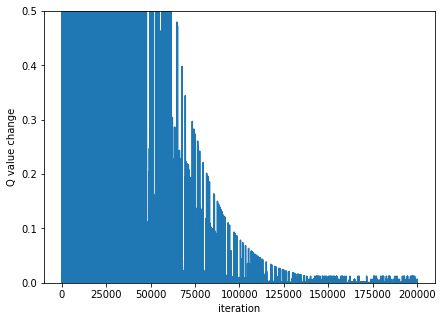

In [3]:
plot_error(hist_q, "figures/Q.png")

### Friend-Q

In [4]:
env = soccer_game()
learner_friendQ = FriendQ(env.nS, env.nA)

hist_friendQ = learning_2005(learner_friendQ, env, epsilon=1)

100%|██████████| 200000/200000 [00:10<00:00, 19403.39it/s]


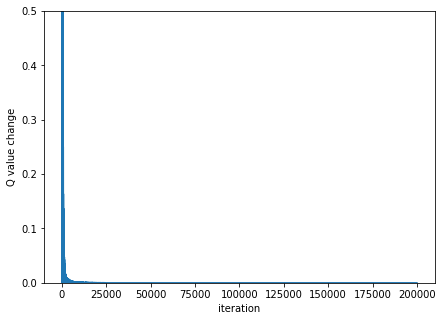

In [5]:
plot_error(hist_friendQ, "figures/friendQ.png")

In [6]:
# Q table for state 71
show_table(learner_friendQ.agents[0].Q[71])
show_table(learner_friendQ.agents[1].Q[71])

player B,stick,W,E,N,S
player A,,,,,
stick,9.0,10.0,8.551,9.000,8.999
W,9.0,10.0,8.776,9.000,8.992
E,9.0,10.0,-0.935,9.000,9.000
N,9.0,10.0,8.553,9.000,9.000
S,9.0,10.0,8.085,8.993,9.000


player B,stick,W,E,N,S
player A,,,,,
stick,8.527,-10.0,9.000,8.525,8.087
W,8.517,-10.0,8.762,8.524,8.088
E,8.094,-10.0,9.495,8.096,8.100
N,8.526,-10.0,8.996,8.523,8.100
S,8.099,-10.0,9.000,8.092,8.487


In [7]:
# Player 2's action
learner_friendQ.agents[1].select_action(71)

2

### Foe-Q

In [8]:
env = soccer_game()
learner_foeQ = FoeQ(env.nS, env.nA)

hist_foeQ = learning_2005(learner_foeQ, env, epsilon=1)

100%|██████████| 200000/200000 [01:52<00:00, 1777.33it/s]


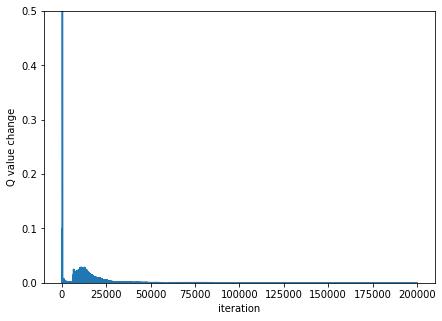

In [9]:
plot_error(hist_foeQ, "figures/foeQ.png")

In [10]:
# Q value for state(71)
show_table(learner_foeQ.agent1.Q[71])
show_table(learner_foeQ.agent2.Q[71])

player B,stick,W,E,N,S
player A,,,,,
stick,-1.985,-1.930,-3.449,-1.960,-3.089
W,10.000,10.000,10.000,10.000,10.000
E,1.884,-0.038,-9.060,1.873,-2.941
N,-1.938,-1.931,-3.448,-1.962,-3.060
S,-3.639,-5.097,-6.582,-3.614,-1.878


player B,stick,W,E,N,S
player A,,,,,
stick,1.985,-10.0,-1.884,1.938,3.639
W,1.930,-10.0,0.038,1.931,5.097
E,3.449,-10.0,9.060,3.448,6.582
N,1.960,-10.0,-1.873,1.962,3.614
S,3.089,-10.0,2.941,3.060,1.878


In [11]:
# Policy -- probablity distribution
# stick left right up down
learner_foeQ.agent1.p[71].round(3),  learner_foeQ.agent2.p[71].round(3)

(array([0.   , 0.   , 0.   , 0.423, 0.577]),
 array([0.606, 0.   , 0.   , 0.   , 0.394]))

### Correlated Q

In [12]:
env = soccer_game()
learner_ceQ = ceQ(env.nS, env.nA)

hist_ceQ = learning_2005(learner_ceQ, env, epsilon=1)

100%|██████████| 200000/200000 [14:51<00:00, 224.45it/s]


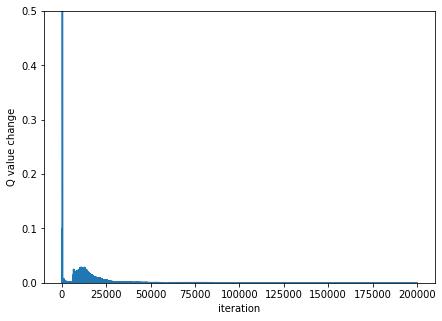

In [13]:
plot_error(hist_ceQ, "figures/ceQ.png")

In [14]:
# Q value for state(71)
show_table(learner_ceQ.agents[0].Q[71])
show_table(learner_ceQ.agents[1].Q[71])

player B,stick,W,E,N,S
player A,,,,,
stick,-1.985,10.0,1.884,-1.938,-3.639
W,-1.930,10.0,-0.038,-1.931,-5.097
E,-3.449,10.0,-9.060,-3.448,-6.582
N,-1.960,10.0,1.873,-1.962,-3.614
S,-3.089,10.0,-2.941,-3.060,-1.878


player B,stick,W,E,N,S
player A,,,,,
stick,1.985,-10.0,-1.884,1.938,3.639
W,1.930,-10.0,0.038,1.931,5.097
E,3.449,-10.0,9.060,3.448,6.582
N,1.960,-10.0,-1.873,1.962,3.614
S,3.089,-10.0,2.941,3.060,1.878


In [15]:
# Policy -- probablity distribution
# stick left right up down
p = learner_ceQ.p[71].reshape(5,5)
p.sum(axis=1).round(3), p.sum(axis=0).round(3) #for each agent i's marginal probabiliby, we should sum up all axis!=i

(array([0.   , 0.   , 0.   , 0.423, 0.577]),
 array([0.606, 0.   , 0.   , 0.   , 0.394]))

### Compare Foe-Q and Correlated-Q Q values

* difference between Q values

In [16]:
np.round(learner_ceQ.agents[0].Q[71]-learner_foeQ.agent1.Q[71].T, 10)

array([[ 2.00e-08,  0.00e+00, -2.60e-08,  1.98e-08,  3.00e-10],
       [ 1.94e-08,  0.00e+00, -3.50e-09,  1.94e-08,  6.50e-09],
       [ 1.41e-08,  0.00e+00,  4.90e-09,  1.41e-08,  1.61e-08],
       [ 1.94e-08,  0.00e+00, -2.61e-08,  1.97e-08,  3.00e-10],
       [ 1.55e-08,  0.00e+00,  2.10e-09,  1.60e-08,  1.88e-08]])

* Given a same Q table, foe-Q and ce-Q should give the same solution

In [17]:
Q = np.array([[-25., -26., -29., -26., -36.],
              [100., 100., 100., 100., 100.],
              [ 10.,  -7., -91.,  10., -33.],
              [-28., -28., -28., -27., -37.],
              [-39., -38., -65., -39., -24.]])
learner_foeQ.agent1.Q[71] = Q
learner_foeQ.agent2.Q[71] = -Q.T

In [18]:
learner_foeQ.agent1.minmax(71)
print("p1", learner_foeQ.agent1.p[71].round(3), "V1", learner_foeQ.agent1.V[71])
learner_foeQ.agent2.minmax(71)
print("p1", learner_foeQ.agent2.p[71].round(3), "V1", learner_foeQ.agent2.V[71])

p1 [0.   0.   0.   0.52 0.48] V1 -31.800000000000004
p1 [0.  0.  0.  0.6 0.4] V1 31.8


In [19]:
learner_ceQ.agents[0].Q[71] = Q.T
learner_ceQ.agents[1].Q[71] = -Q.T

learner_ceQ.solve(71)
p = learner_ceQ.p[71].reshape(5,5)
print("p1", p.sum(axis=1).round(3), "V1", learner_ceQ.agents[0].V[71])
print("p2", p.sum(axis=0).round(2), "V2", learner_ceQ.agents[1].V[71])

p1 [0.   0.   0.   0.52 0.48] V1 -31.799999894036688
p2 [0.  0.  0.  0.6 0.4] V2 31.799999894036688
